/usr/lib64/python3.12/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/lib64/python3.12/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


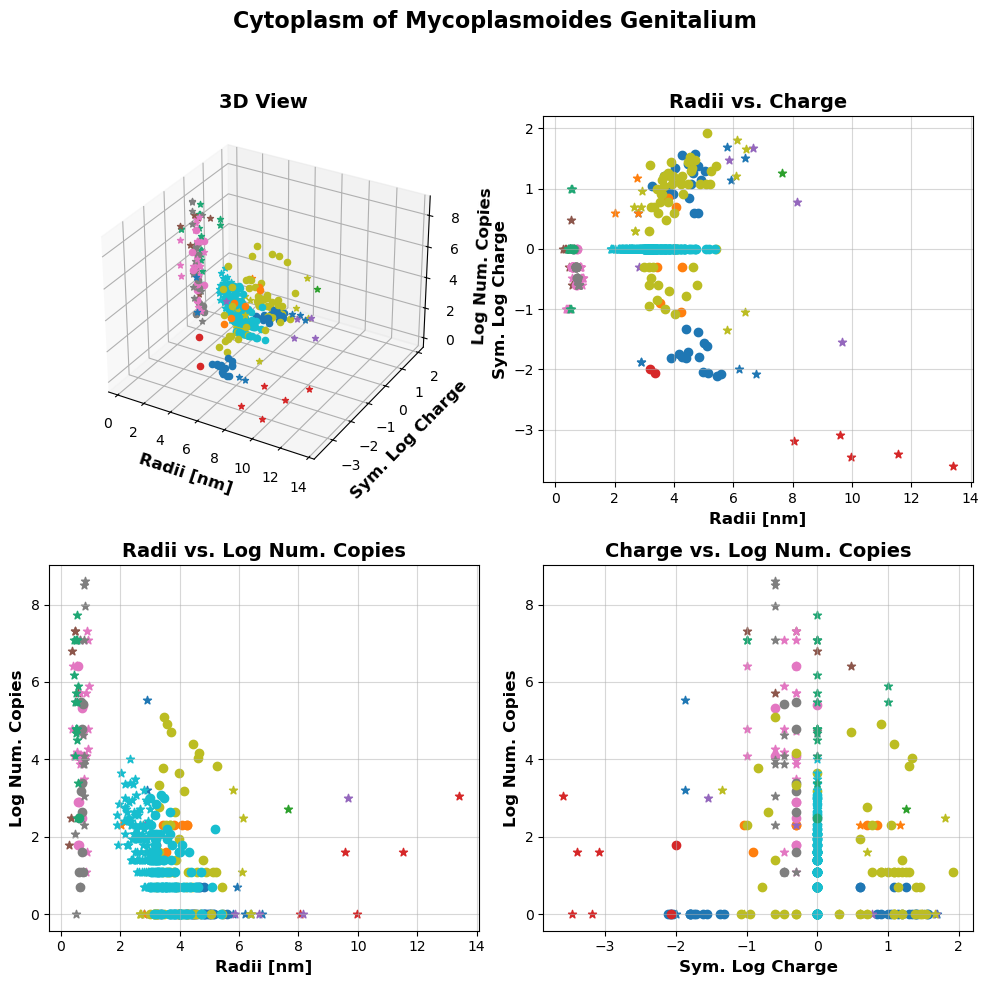

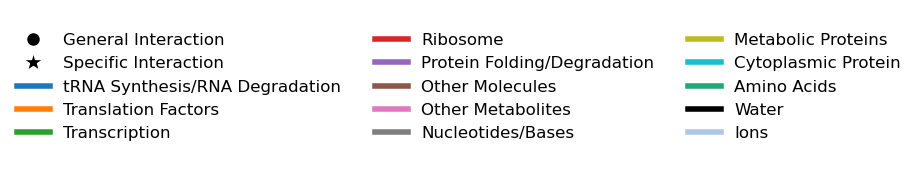

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Increase the font size and bold the text for titles and axis labels globally
plt.rcParams.update({
    'axes.titlesize': 15,  # Increase the font size of the title
    'axes.titleweight': 'bold',  # Bold the title font
    'axes.labelsize': 15,  # Increase the font size of the axis labels
    'axes.labelweight': 'bold',  # Bold the axis label font
    'grid.alpha': 0.5,  # Set grid line transparency
    'legend.fontsize': 12  # Set the legend font size
})

# Custom symmetric log function for charge transformation
def symlog(x, linthresh=1):
    is_negative = x < 0
    abs_x = np.abs(x)
    abs_x = np.where(x == 0, 0, np.where(abs_x < linthresh, linthresh, np.log10(abs_x)))
    return np.where(is_negative, -abs_x, abs_x)

# Manually assigned colors for each type of species
manual_color_map = {
    'tRNA Synthesis/RNA Degradation': '#1f77b4',
    'Translation Factors': '#ff7f0e',
    'Transcription': '#2ca02c',
    'Ribosome': '#d62728',
    'Protein Folding/Degradation': '#9467bd',
    'Other Molecules': '#8c564b',
    'Other Metabolites': '#e377c2',
    'Nucleotides/Bases': '#7f7f7f',
    'Metabolic Proteins': '#bcbd22',
    'Cytoplasmic Protein': '#17becf',
    'Amino Acids': '#1fa774',
    'Water': '#000000',
    'Ions': '#aec7e8'
}


# Load the interaction matrix
interaction_matrix_path = "InteractionMatrix.csv"
interaction_df = pd.read_csv(interaction_matrix_path)

# Function to prepare data, assign colors and markers
def prepare_data(file_path):
    df = pd.read_excel(file_path)
    df['Marker'] = df['Name'].apply(lambda x: '*' if x in interaction_df.columns and (interaction_df[x] == 5).any() else 'o')
    df['Color'] = df['Tag'].apply(lambda x: manual_color_map.get(x, '#000000'))
    df['Radii'] = pd.to_numeric(df.iloc[:, 4], errors='coerce')
    df['ChargeTransformed'] = symlog(pd.to_numeric(df.iloc[:, 1], errors='coerce'))
    df['LogNCopies'] = np.log(pd.to_numeric(df.iloc[:, 3], errors='coerce'))
    return df

# Function to plot data and save the figures, including grid lines and formatted titles/labels
def plot_data(df, title, file_name_prefix):
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(221, projection='3d')
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    for _, row in df.iterrows():
        ax1.scatter(row['Radii'], row['ChargeTransformed'], row['LogNCopies'], color=row['Color'], marker=row['Marker'])
        ax2.scatter(row['Radii'], row['ChargeTransformed'], color=row['Color'], marker=row['Marker'])
        ax3.scatter(row['Radii'], row['LogNCopies'], color=row['Color'], marker=row['Marker'])
        ax4.scatter(row['ChargeTransformed'], row['LogNCopies'], color=row['Color'], marker=row['Marker'])

    # Set titles and labels with specific formatting
    for ax in [ax2, ax3, ax4]: # Enable grid for 2D plots
        ax.grid(True)

    # Adjust title and axis labels for all plots
    ax1.set_title('3D View', fontsize=14, fontweight='bold')
    ax2.set_title('Radii vs. Charge', fontsize=14, fontweight='bold')
    ax3.set_title('Radii vs. Log Num. Copies', fontsize=14, fontweight='bold')
    ax4.set_title('Charge vs. Log Num. Copies', fontsize=14, fontweight='bold')

    # Adjusting axis labels
    ax_labels = [
        ('Radii [nm]', 'Sym. Log Charge', 'Log Num. Copies'),
        ('Radii [nm]', 'Sym. Log Charge'),
        ('Radii [nm]', 'Log Num. Copies'),
        ('Sym. Log Charge', 'Log Num. Copies')
    ]
    
    for ax, labels in zip([ax1, ax2, ax3, ax4], ax_labels):
        ax.set_xlabel(labels[0], fontsize=12, fontweight='bold')
        ax.set_ylabel(labels[1], fontsize=12, fontweight='bold')
        if len(labels) == 3:
            ax.set_zlabel(labels[2], fontsize=12, fontweight='bold')

    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit suptitle
    fig.savefig(f'{file_name_prefix}_plot.svg')

    # Creating and saving a separate plot for the legend
    fig_legend, ax_legend = plt.subplots(figsize=(10, 2))
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', label='General Interaction', markersize=10),
                       plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='k', label='Specific Interaction', markersize=15)]
    for tag, color in manual_color_map.items():
        legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=tag))
    ax_legend.legend(handles=legend_elements, loc='center', ncol=3, frameon=False)
    ax_legend.axis('off')
    fig_legend.savefig(f'{file_name_prefix}_legend.svg')
    plt.show()

# Prepare everything
df_with_ions = prepare_data("SpeciesList_Annotated.ods")
df_no_ions = prepare_data("SpeciesList-NoIons_Annotated.ods")

# Plot for Species With Ions (water_ions) and save
#plot_data(df_with_ions, "Cytoplasm of Mycoplasmoides Genitalium", "WithIons")

# Plot for Species Without Ions (NoWaterIons) and save
plot_data(df_no_ions, "Cytoplasm of Mycoplasmoides Genitalium", "NoIons")


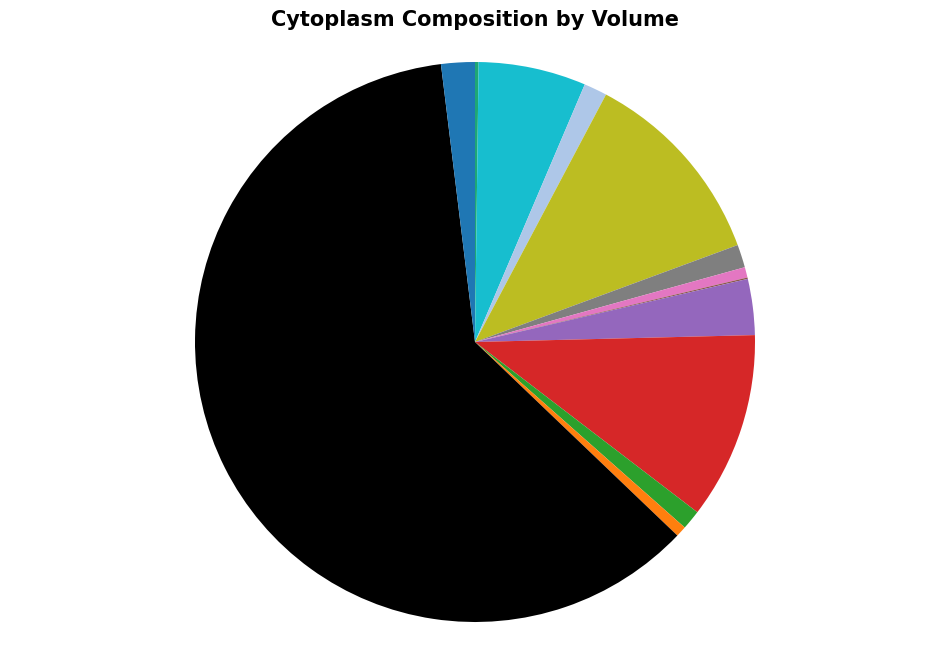

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Increase the font size and bold the text for titles and axis labels globally
plt.rcParams.update({
    'axes.titlesize': 15,  # Increase the font size of the title
    'axes.titleweight': 'bold',  # Bold the title font
    'axes.labelsize': 15,  # Increase the font size of the axis labels
    'axes.labelweight': 'bold',  # Bold the axis label font
    'grid.alpha': 0.5,  # Set grid line transparency
    'legend.fontsize': 12  # Set the legend font size
})

# Manually assigned colors for each type of species
manual_color_map = {
    'tRNA Synthesis/RNA Degradation': '#1f77b4',
    'Translation Factors': '#ff7f0e',
    'Transcription': '#2ca02c',
    'Ribosome': '#d62728',
    'Protein Folding/Degradation': '#9467bd',
    'Other Molecules': '#8c564b',
    'Other Metabolites': '#e377c2',
    'Nucleotides/Bases': '#7f7f7f',
    'Metabolic Proteins': '#bcbd22',
    'Cytoplasmic Protein': '#17becf',
    'Amino Acids': '#1fa774',
    'Water': '#000000',
    'Ions': '#aec7e8'
}

# Load the interaction matrix
interaction_matrix_path = "InteractionMatrix.csv"
interaction_df = pd.read_csv(interaction_matrix_path)

# Adjusted function to prepare data for Volume Fraction calculation
def prepare_data(file_path):
    df = pd.read_excel(file_path)
    df.rename(columns={df.columns[3]: 'NCopies'}, inplace=True)
    df['Marker'] = df['Name'].apply(lambda x: '*' if x in interaction_df.columns and (interaction_df[x] == 5).any() else 'o')
    df['Color'] = df['Tag'].apply(lambda x: manual_color_map.get(x, '#000000'))
    df['Radii'] = pd.to_numeric(df.iloc[:, 4], errors='coerce')
    df['ChargeTransformed'] = pd.to_numeric(df.iloc[:, 1], errors='coerce')
    df['LogNCopies'] = np.log(pd.to_numeric(df['NCopies'], errors='coerce'))
    
    # Calculate volume for each species
    df['Volume'] = 4/3 * np.pi * np.power(df['Radii'], 3) * df['NCopies']
    # Calculate total volume
    total_volume = df['Volume'].sum()
    # Calculate volume fraction
    df['VolumeFraction'] = df['Volume'] / total_volume
    return df

# Adjusted function to plot square pie chart for Volume Fraction without labels inside
def plot_square_pie(df, title, exclude=None):
    if exclude:
        df = df[~df['Tag'].isin(exclude)]
    # Sum the VolumeFraction for each Tag
    fractions = df.groupby('Tag')['VolumeFraction'].sum()
    labels = [f'{tag} ({fraction:.2%})' for tag, fraction in fractions.items()]  # Format fractions as percentages
    colors = [manual_color_map.get(tag, '#000000') for tag in fractions.index]
    
    # Plot
    fig, ax = plt.subplots()
    wedges, _ = ax.pie(fractions, colors=colors, startangle=90, counterclock=False)
    
    # Create a legend outside the pie chart
    #ax.legend(wedges, labels, title="Species", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.title(title)
    
    # Adjust the size of the figure to make the pie chart more "square" and accommodate the legend
    fig.set_size_inches(12, 8)  # Increased figure size for better layout with the legend
    plt.savefig(f'CytoPiePlot.svg')
    plt.show()

# Load and prepare your data
df = prepare_data("SpeciesList_Annotated.ods")

# Example usage
plot_square_pie(df, "Cytoplasm Composition by Volume")
#plot_square_pie(df, "Cytoplasm Composition Excluding Water and Ions", exclude=['Water', 'Ions'])


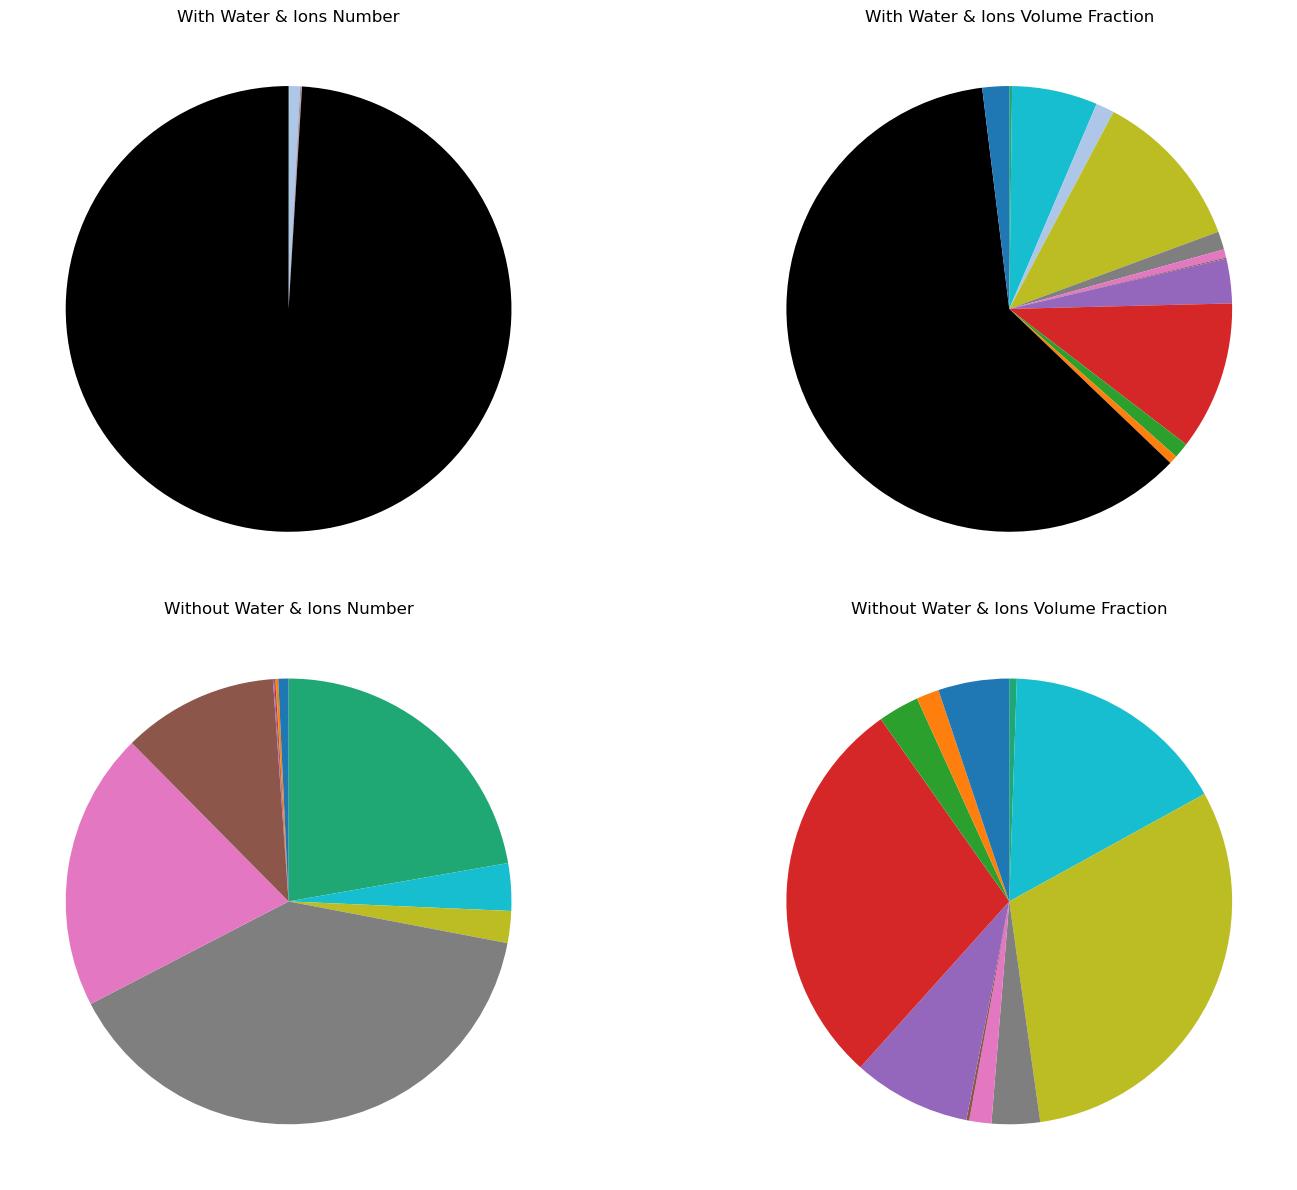

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming manual_color_map and interaction_matrix_path are defined above...
# Manually assigned colors for each type of species
manual_color_map = {
    'tRNA Synthesis/RNA Degradation': '#1f77b4',
    'Translation Factors': '#ff7f0e',
    'Transcription': '#2ca02c',
    'Ribosome': '#d62728',
    'Protein Folding/Degradation': '#9467bd',
    'Other Molecules': '#8c564b',
    'Other Metabolites': '#e377c2',
    'Nucleotides/Bases': '#7f7f7f',
    'Metabolic Proteins': '#bcbd22',
    'Cytoplasmic Protein': '#17becf',
    'Amino Acids': '#1fa774',
    'Water': '#000000',
    'Ions': '#aec7e8'
}

# Load the interaction matrix
interaction_matrix_path = "InteractionMatrix.csv"
interaction_df = pd.read_csv(interaction_matrix_path)


def prepare_data(file_path, include_volume_fraction=False):
    df = pd.read_excel(file_path)
    df.rename(columns={df.columns[3]: 'NCopies'}, inplace=True)
    df['Color'] = df['Tag'].apply(lambda x: manual_color_map.get(x, '#000000'))
    
    if include_volume_fraction:
        # Assume 'Radii' is at position 4, adjust if necessary
        df['Radii'] = pd.to_numeric(df.iloc[:, 4], errors='coerce')
        df['Volume'] = 4/3 * np.pi * np.power(df['Radii'], 3) * df['NCopies']
        total_volume = df['Volume'].sum()
        df['VolumeFraction'] = df['Volume'] / total_volume
    
    return df

def plot_pie_charts(df_number, df_volume_fraction, title, ax):
    # For Number
    counts = df_number.groupby('Tag')['NCopies'].sum()
    colors = [manual_color_map.get(tag, '#000000') for tag in counts.index]
    ax[0].pie(counts, colors=colors, startangle=90, counterclock=False)
    ax[0].set_title(f'{title} Number')
    
    # For Volume Fraction
    fractions = df_volume_fraction.groupby('Tag')['VolumeFraction'].sum()
    colors = [manual_color_map.get(tag, '#000000') for tag in fractions.index]
    ax[1].pie(fractions, colors=colors, startangle=90, counterclock=False)
    ax[1].set_title(f'{title} Volume Fraction')

# Prepare Data
df_with_ions = prepare_data("SpeciesList_Annotated.ods")
df_with_ions_vf = prepare_data("SpeciesList_Annotated.ods", include_volume_fraction=True)
df_no_ions = prepare_data("SpeciesList-NoIons_Annotated.ods")
df_no_ions_vf = prepare_data("SpeciesList-NoIons_Annotated.ods", include_volume_fraction=True)

# Exclude Water and Ions for the 'No Ions' DataFrames
exclude_tags = ['Water', 'Ions']
df_no_ions = df_no_ions[~df_no_ions['Tag'].isin(exclude_tags)]
df_no_ions_vf = df_no_ions_vf[~df_no_ions_vf['Tag'].isin(exclude_tags)]

# Plot
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Top Left: With Water Ions Number
# Top Right: With Water Ions Volume Fraction
plot_pie_charts(df_with_ions, df_with_ions_vf, "With Water & Ions", ax[0])

# Bottom Left: Without Water Ions Number
# Bottom Right: Without Water Ions Volume Fraction
plot_pie_charts(df_no_ions, df_no_ions_vf, "Without Water & Ions", ax[1])

plt.tight_layout()
plt.show()
